# ANALYSING FOOD PRODUCTION AND SUPPLY IN AFRICA - [Pattern Recognition Project]

Working on the food supply/consumption data of Africa from the year 2004 to 2013 alongside the data of food production within the same range of years. With the sole purpose of discovering trends and patterns within the two datasets and how food is supplied and produced in the continent of Africa.


In [1]:
#importing relevant modules.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#fetching the needed datasets

prod = pd.read_csv('Africa Food Production (2004 - 2013).csv')
supp = pd.read_csv('Africa Food Supply (2004 - 2013).csv')

In [3]:
#viewing the production data 

prod

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [4]:
#viewing the supply dataset

supp

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


# Working on the Food Production Data.


### (A). Dataset exploration

In [5]:
#having a glance at the statistic description of the dataset

prod.describe(include = 'all')

,Country,Item,Year,Value
count,23110,23110,23110.000000,23110.000000
unique,45,94,NaN,NaN
top,United Republic of Tanzania,Milk - Excluding Butter,NaN,NaN
freq,790,450,NaN,NaN
mean,NaN,NaN,2008.498269,327.785201
std,NaN,NaN,2.871740,1607.940343
min,NaN,NaN,2004.000000,0.000000
25%,NaN,NaN,2006.000000,3.000000
50%,NaN,NaN,2008.000000,18.000000
75%,NaN,NaN,2011.000000,108.000000


In [6]:
#checking the information of the prod dataset

prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [7]:
#looking out for null values in the dataset

prod.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [8]:
#checking for unique values in the various columns of the dataset

prod.nunique()

Country      45
Item         94
Year         10
Value      2134
dtype: int64

From the above, we have 45 countries covered by the dataset and 94 food items being produced. The data spans across a 10 year period. And the values of each item was specified in the data.

### (B). Dataset Cleaning.

In [9]:
#converting the year Dtype from int64 to datetime

prod['Year'] = pd.to_datetime(prod['Year'], format = "%Y")

In [10]:
#renaming the value column to add the unit of the numerical values

prod.rename(columns = {'Value' : 'Value (Kt)'}, inplace = True)

In [11]:
#recheck for the data info to confirm date dtype change

prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Country     23110 non-null  object        
 1   Item        23110 non-null  object        
 2   Year        23110 non-null  datetime64[ns]
 3   Value (Kt)  23110 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 722.3+ KB


### (C). Analysing the Production dataset

Q1 - How has food production been like in Africa within the given time period?

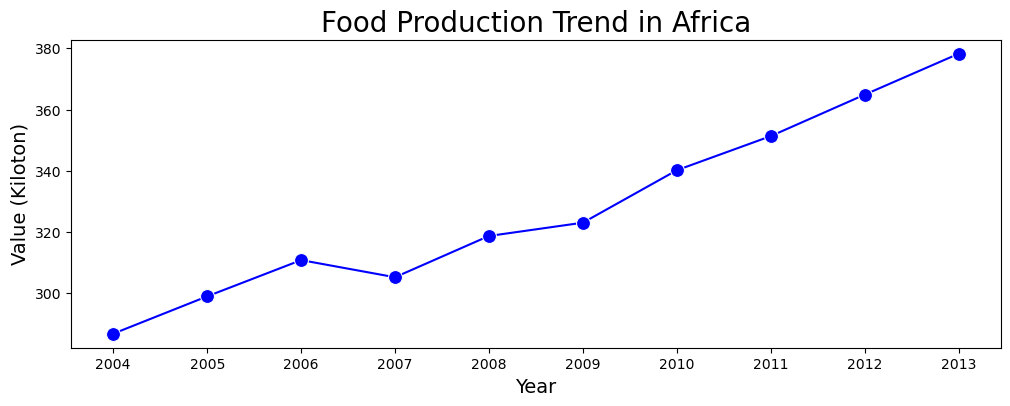

In [12]:
trend = prod.groupby('Year')['Value (Kt)'].mean().sort_values(ascending = True).reset_index(name = 'Value (Kt)')

plt.figure(figsize = [12, 4])
sns.lineplot(data = trend, x ="Year", y = "Value (Kt)", marker='o', markersize=10, color='b')
plt.title("Food Production Trend in Africa", fontsize=20);
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value (Kiloton)', fontsize=14)
plt.savefig('Food production trend.png', bbox_inches = 'tight', dpi = 300)

The line graph shows that there has always been a steady increase in the production of food in Africa except for a sudden drop between the year 2006 and 2007.

Q2 - How many variety of food items did the countries produce?

In [13]:
#countries by number of items they produce

country_items = prod.groupby('Country')['Item'].count().sort_values(ascending = False).reset_index(name = 'Item_num')
country_items

,Country,Item_num
0,United Republic of Tanzania,790
1,Morocco,770
2,South Africa,750
3,Kenya,750
4,Egypt,700
5,Madagascar,690
6,Cameroon,650
7,Cote d'Ivoire,640
8,Zimbabwe,640
9,Mozambique,620


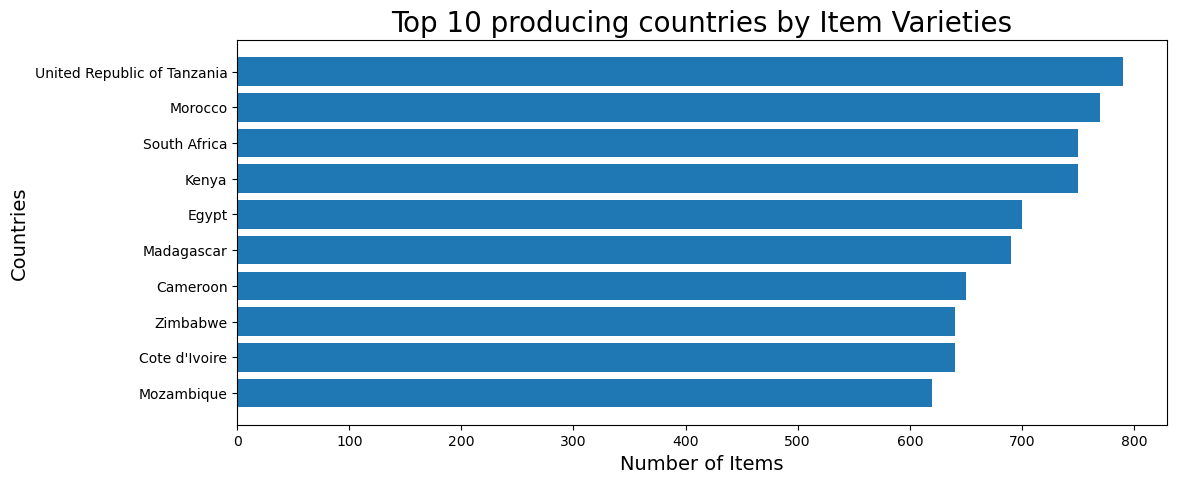

In [14]:
#top 10 countries based on number of items produced.

country_items1 = prod.groupby('Country')['Item'].count().nlargest(10).sort_values(ascending = True).reset_index(name = 'Item_num')

plt.figure(figsize = [12,5])
plt.barh(country_items1['Country'], country_items1['Item_num'])
plt.title('Top 10 producing countries by Item Varieties', fontsize = 20)
plt.xlabel('Number of Items', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('top 10 variety.png', bbox_inches = 'tight', dpi = 300)

The bar above indicates that the United Republic of Tanzania produces the highest number of varieties of food items peeged at 790, followed by Morocco at 770 items and South Africa at 750 items.

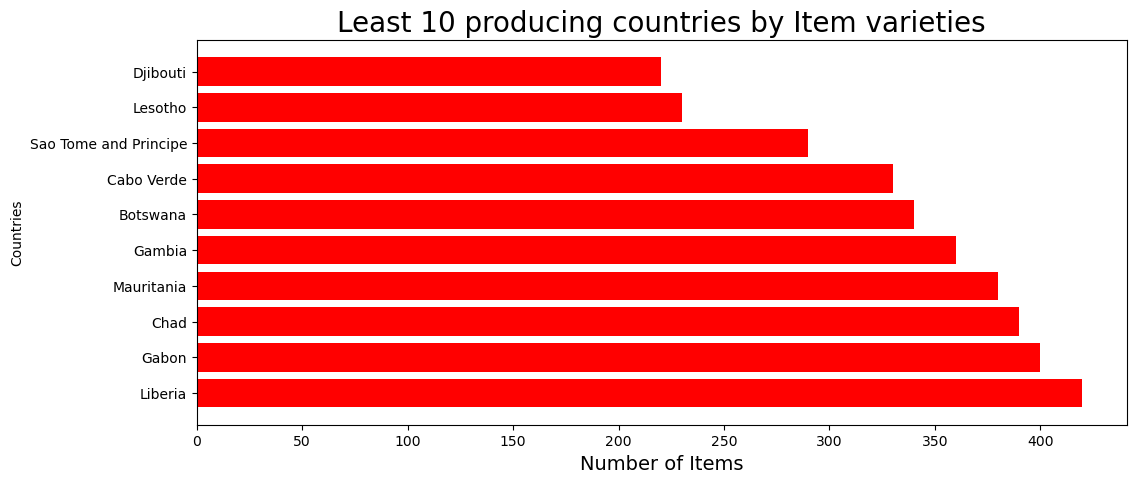

In [15]:
#least 10 countries based on number of items produced

country_items2 = prod.groupby('Country')['Item'].count().nsmallest(10).sort_values(ascending = False).reset_index(name = 'Item_num')

plt.figure(figsize = [12,5])
plt.barh(country_items2['Country'], country_items2['Item_num'], color = 'r')
plt.title('Least 10 producing countries by Item varieties', fontsize = 20)
plt.xlabel('Number of Items', fontsize = 14)
plt.ylabel('Countries')
plt.savefig('least 10 variety.png', bbox_inches = 'tight', dpi = 300)

Djibouti produced the least number of varieties of food items at 220 items followed by Lesotho producing just 230 then Sao Tome and Principe giving us a total of 290 food items. 

Q3 - Which Countries produces the most food by volume?

In [16]:
#countries by volume of food produced.

country_vol =prod.groupby('Country')['Value (Kt)'].sum().sort_values(ascending = True).reset_index()
country_vol

,Country,Value (Kt)
0,Djibouti,666
1,Sao Tome and Principe,1152
2,Cabo Verde,1658
3,Lesotho,3785
4,Gambia,4699
5,Botswana,4808
6,Guinea-Bissau,7296
7,Mauritania,10039
8,Gabon,13566
9,Namibia,14197


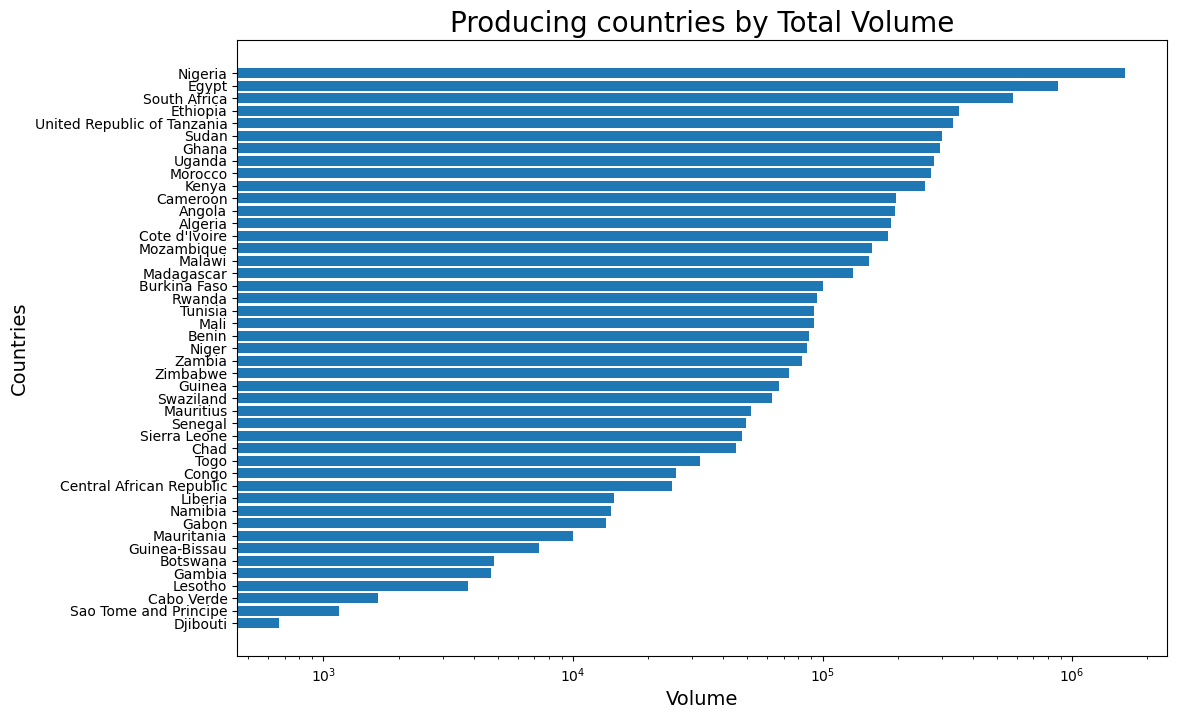

In [17]:
#visualizing the production of the nations by volume

plt.figure(figsize = [12,8])
plt.xscale('log')
plt.barh(country_vol['Country'], country_vol['Value (Kt)'])
plt.title('Producing countries by Total Volume', fontsize = 20)
plt.xlabel('Volume', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('all production.png', bbox_inches = 'tight', dpi = 300)

This is the chart showing list of the countries and how they produced food in the 10 years period.

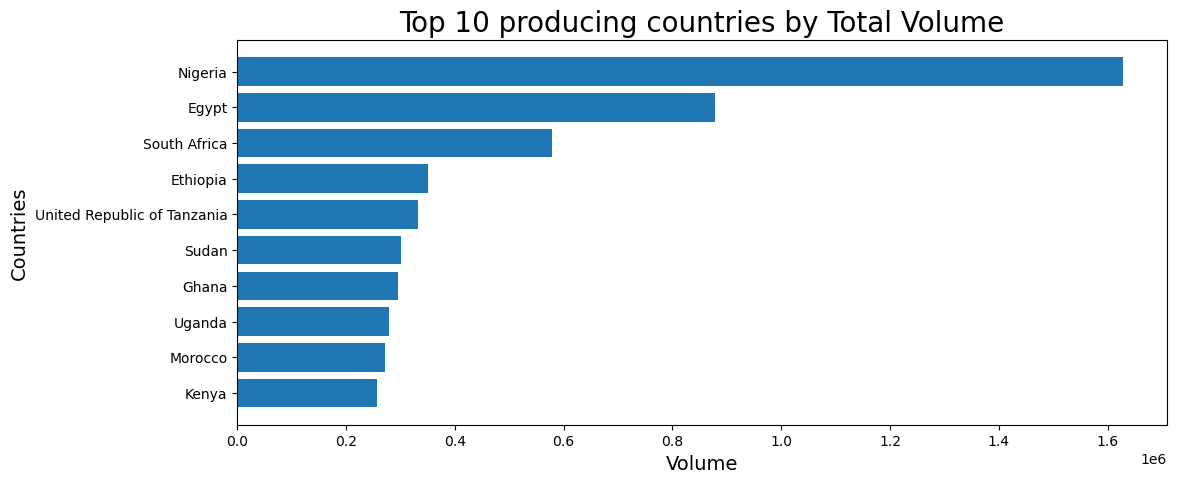

In [18]:
#top 10 producing countries by volume

country_vol1 =prod.groupby('Country')['Value (Kt)'].sum().nlargest(10).sort_values(ascending = True).reset_index()

plt.figure(figsize = [12,5])
plt.barh(country_vol1['Country'], country_vol1['Value (Kt)'])
plt.title('Top 10 producing countries by Total Volume', fontsize = 20)
plt.xlabel('Volume', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('top 10 volume.png', bbox_inches = 'tight', dpi = 300)

Analsying by the volume of food produced by these countries, we have it that Nigeria is the topmost producer of food by volume at 1628030 Kilotons of food, followed by Egypt producing 877498 Kilotons whereas South Africa comes a distant third at 579592 Kilotons of food in a period of 10 years.

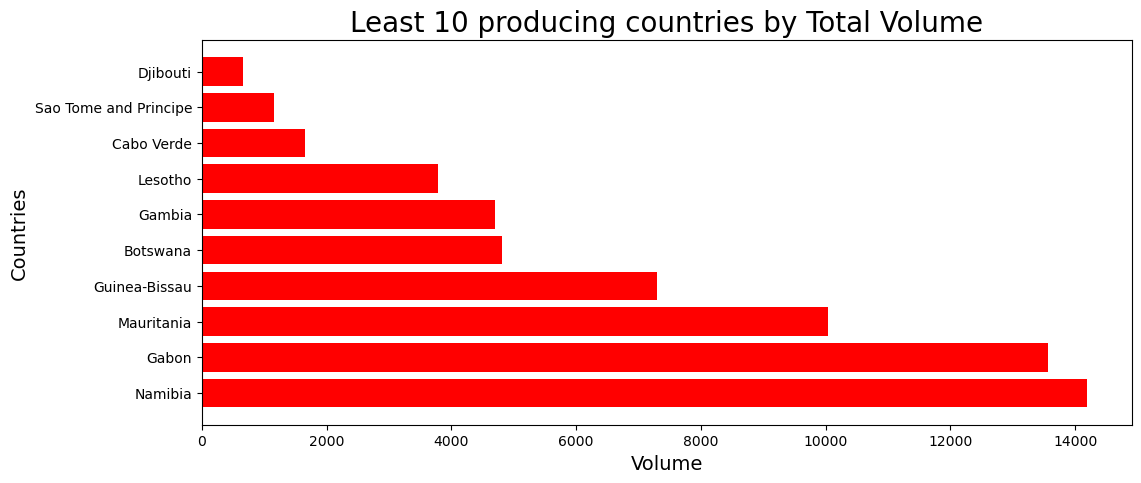

In [19]:
#least 10 producing countries by volume

country_vol2 =prod.groupby('Country')['Value (Kt)'].sum().nsmallest(10).sort_values(ascending = False).reset_index()

plt.figure(figsize = [12,5])
plt.barh(country_vol2['Country'], country_vol2['Value (Kt)'], color = 'r')
plt.title('Least 10 producing countries by Total Volume', fontsize = 20)
plt.xlabel('Volume', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('least 10 volume.png', bbox_inches = 'tight', dpi = 300)

Also looking at the volumes, Djibouti sits comfortably as the least producer of food in qunantity having produced just 666 Kilotons of food in 10 years.

Q4 - Determine the most and least produced items by volume

In [20]:
#items by volume produced in 10 years

item_vol = prod.groupby('Item')['Value (Kt)'].sum().sort_values(ascending = True).reset_index()
item_vol

,Item,Value (Kt)
0,"Aquatic Animals, Others",13
1,"Fish, Liver Oil",28
2,Pepper,199
3,"Molluscs, Other",214
4,Cloves,249
...,...,...
89,"Vegetables, Other",410403
90,Yams,511523
91,Maize and products,574948
92,Sugar cane,887008


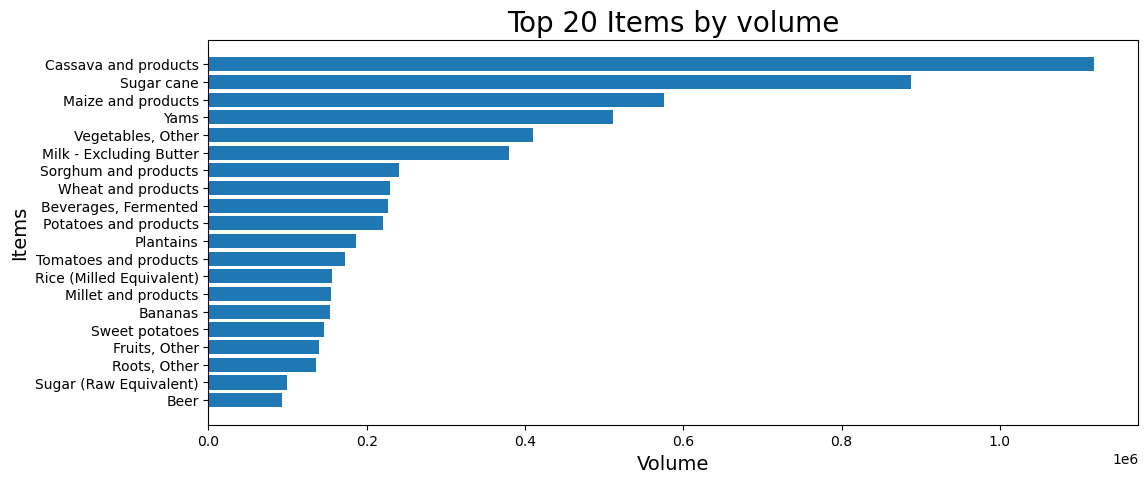

In [21]:
#top 20 items by volume produced in 10 years

item_vol1 = prod.groupby('Item')['Value (Kt)'].sum().nlargest(20).sort_values(ascending = True).reset_index()

plt.figure(figsize = [12,5])
plt.barh(item_vol1['Item'], item_vol1['Value (Kt)'])
plt.title('Top 20 Items by volume', fontsize = 20)
plt.xlabel('Volume', fontsize = 14)
plt.ylabel('Items', fontsize = 14)
plt.savefig('20 top items.png', bbox_inches = 'tight', dpi = 300)

The chart above indicates that the highest food items produced in Africa in the 10 years in review are Cassava and Allied products, Sugar cane and Maize and its products.

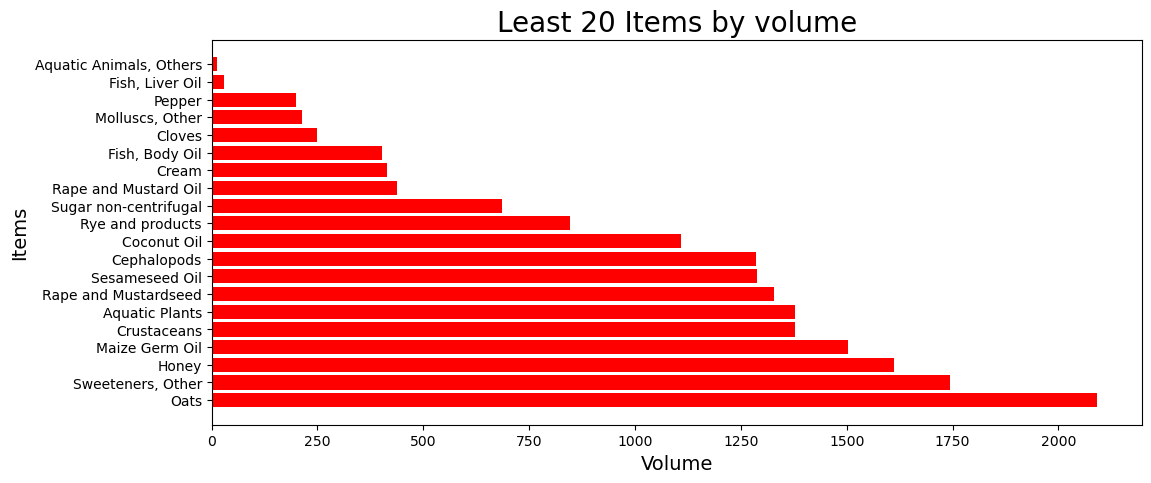

In [22]:
#least 20 items by volume produced in 10 years

item_vol2 = prod.groupby('Item')['Value (Kt)'].sum().nsmallest(20).sort_values(ascending = False).reset_index()

plt.figure(figsize = [12,5])
plt.barh(item_vol2['Item'], item_vol2['Value (Kt)'], color = 'r')
plt.title('Least 20 Items by volume', fontsize = 20)
plt.ylabel('Items', fontsize = 14)
plt.xlabel('Volume', fontsize = 14)
plt.savefig('20 least items.png', bbox_inches = 'tight', dpi = 300)

Whereas, Aquatic animals and Others, Fish and liver oil and Pepper happens to be the least produced items in Afric as indicted by the chart above.

Q5 - Find out items and the number of countries producing them

In [23]:
#looking out for items and the number of countries producing it 

items_cy = prod.groupby('Item')['Country'].nunique().sort_values(ascending = True).reset_index()
items_cy

,Item,Country
0,Cloves,3
1,Rye and products,3
2,Rape and Mustard Oil,4
3,Olive Oil,4
4,Sugar non-centrifugal,4
...,...,...
89,"Offals, Edible",45
90,"Fruits, Other",45
91,Milk - Excluding Butter,45
92,"Vegetables, Other",45


This query result above indicates that in the whole of Africa, only 3 countries produce Cloves. This is very poor, whereas the entire 45 countries produces Mutton and Goat meat. 

In [24]:
#find the name of the countries producing the items 

items_cyc = prod.groupby(['Item', 'Country'])['Country'].nunique()
pd.set_option('display.max_rows', None)
items_cyc

Item                             Country                    
Alcohol, Non-Food                Egypt                          1
                                 Kenya                          1
                                 Mali                           1
                                 Mauritius                      1
                                 Morocco                        1
                                 South Africa                   1
                                 Swaziland                      1
                                 Zimbabwe                       1
Apples and products              Algeria                        1
                                 Egypt                          1
                                 Kenya                          1
                                 Madagascar                     1
                                 Morocco                        1
                                 South Africa                   1
               

From the query result above, we can decipher the various countries that produce each item. For instance, in the matter of Cloves which only three countries produce, the countries are Kenya, Madagascar and the United Republic of Tanzania. 

Q6 - Provide an insight on how each country produced food per year

In [25]:
#getting how each country produced food per year

food_year = prod.groupby(['Country', 'Year'])['Value (Kt)'].sum().sort_values(ascending = True).reset_index()
food_year

,Country,Year,Value (Kt)
0,Djibouti,2004-01-01,55
1,Djibouti,2006-01-01,56
2,Djibouti,2008-01-01,62
3,Djibouti,2005-01-01,62
4,Djibouti,2007-01-01,63
5,Djibouti,2009-01-01,68
6,Djibouti,2011-01-01,72
7,Djibouti,2010-01-01,75
8,Djibouti,2013-01-01,76
9,Djibouti,2012-01-01,77


In [26]:
#selecting the least two and top two producing countries

djib = food_year[food_year['Country'] == 'Djibouti']
sao = food_year[food_year['Country'] == 'Sao Tome and Principe']
egy = food_year[food_year['Country'] == 'Egypt']
nig = food_year[food_year['Country'] == 'Nigeria']


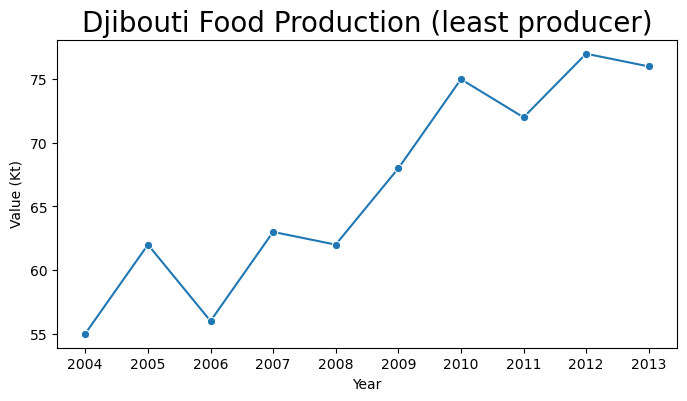

In [27]:
#plotting how Djibouti produced

plt.figure(figsize = [8,4])
sns.lineplot(data = djib, x = 'Year', y = 'Value (Kt)', marker = 'o')
plt.title('Djibouti Food Production (least producer)', fontsize = 20 )
plt.savefig('djibouti prod.png', bbox_inches = 'tight', dpi = 300)

The chart shows how Djibouti being the least producing countries actually produced food in the 10 years period.

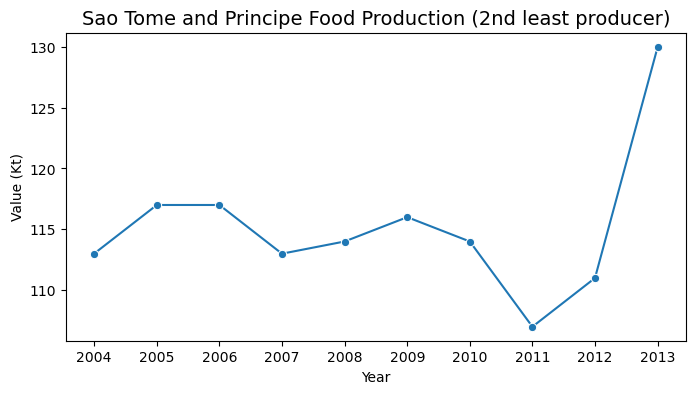

In [28]:
#plotting how Sao Tome and Principe produced food

plt.figure(figsize = [8,4])
sns.lineplot(data = sao , x = 'Year', y = 'Value (Kt)', marker = 'o')
plt.title('Sao Tome and Principe Food Production (2nd least producer)', fontsize = 14)
plt.savefig('sao prod.png', bbox_inches = 'tight', dpi = 300)

This chart above shows how Sao Tome and Principe which is the 2nd least producer by volume faired in food production in the period in question.

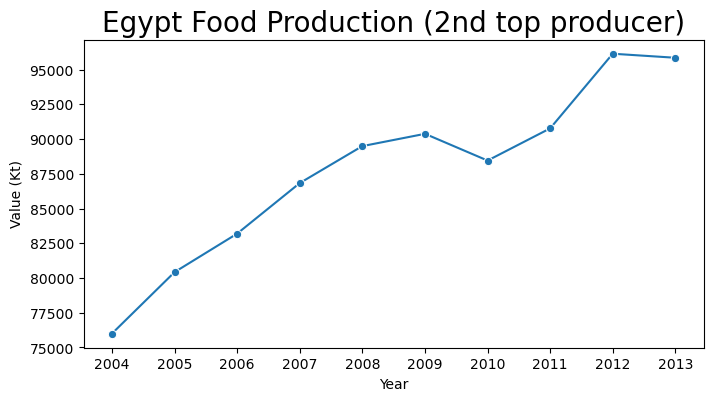

In [29]:
#plotting how egypt produces food

plt.figure(figsize = [8,4])
sns.lineplot(data = egy, x = 'Year', y = 'Value (Kt)', marker = 'o')
plt.title('Egypt Food Production (2nd top producer)', fontsize = 20)
plt.savefig('egypt prod.png', bbox_inches = 'tight', dpi = 300)

Egypt being the 2nd top producer, it would be interesting to figure out how they did it per year. This chart above deals with that.

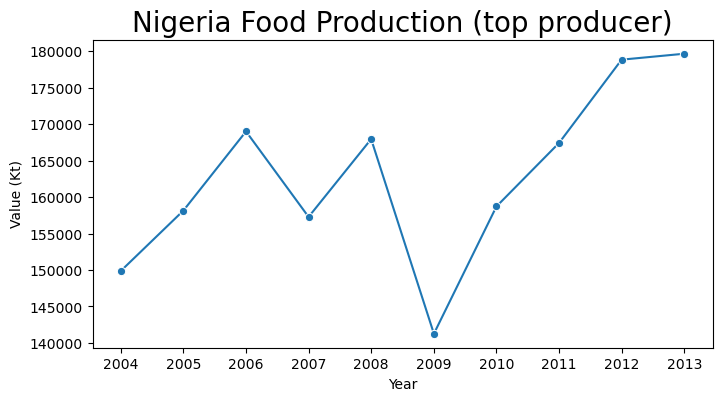

In [30]:
#plotting how Nigeria produced food

plt.figure(figsize = [8,4])
sns.lineplot(data = nig, x = 'Year', y = 'Value (Kt)', marker = 'o')
plt.title('Nigeria Food Production (top producer)', fontsize = 20)
plt.savefig('nigeria prod.png', bbox_inches = 'tight', dpi = 300)

The chart above shows us how Nigeria being the top producer by volume did so per year in the 10 years period.

Q7 - Any other Insights from the Production Data?

In [31]:
#getting the mean and median scores

avg = prod['Value (Kt)'].mean()
print(' The mean value of food in Africa is ', avg)

med = prod['Value (Kt)'].median()
print(' The median value of food in Africa is ', med)

 The mean value of food in Africa is  327.7852012115967
 The median value of food in Africa is  18.0


In [32]:
#getting the first quantile and 3rd quantile scores

Q1 = prod['Value (Kt)'].quantile(0.25)
Q3 = prod['Value (Kt)'].quantile(0.75)
print('1st Quantile score is', Q1)
print('3rd Quantile score is', Q3)

1st Quantile score is 3.0
3rd Quantile score is 108.0


In [33]:
#getting the Interquantile Range(IQR)

IQR = Q3 - Q1
print('The Interquantile range is', IQR)

The Interquantile range is 105.0


In [34]:
#getting the UpperFence and LowerFence

LFence = Q1 - (1.5 * IQR)
UFence = Q3 + (1.5 * IQR)
print('The Lower Fence score is ', LFence)
print('The Upper Fence score is ', UFence)

The Lower Fence score is  -154.5
The Upper Fence score is  265.5


In [35]:
#looking for countries that has scores higher than the upper fence score

prod[prod['Value (Kt)'] > UFence].any()

Country       True
Item          True
Year          True
Value (Kt)    True
dtype: bool

In [36]:
#looking for countries that has production score below the lower fence score

prod[prod['Value (Kt)'] < LFence].any()

Country       False
Item          False
Year          False
Value (Kt)    False
dtype: bool

These two cell above indicates that there are countries that has average production values greater than the Upper Fence score whereas there are no countries that produce below the Lower fence score.

In [37]:
#creating the outlier countries.
out = prod[prod['Value (Kt)'] > UFence]
out

,Country,Item,Year,Value (Kt)
0,Algeria,Wheat and products,2004-01-01,2731
1,Algeria,Wheat and products,2005-01-01,2415
2,Algeria,Wheat and products,2006-01-01,2688
3,Algeria,Wheat and products,2007-01-01,2319
4,Algeria,Wheat and products,2008-01-01,1111
5,Algeria,Wheat and products,2009-01-01,2953
6,Algeria,Wheat and products,2010-01-01,2605
7,Algeria,Wheat and products,2011-01-01,2555
8,Algeria,Wheat and products,2012-01-01,3432
9,Algeria,Wheat and products,2013-01-01,3299


In [38]:
#printing out the outlier countries

outlier_countries = out['Country'].unique()
outlier_countries_num = out['Country'].nunique()
print(outlier_countries)
print('\nTotal number of countries with outliers are ', outlier_countries_num)

['Algeria' 'Angola' 'Benin' 'Burkina Faso' 'Cameroon'
 'Central African Republic' 'Chad' 'Congo' "Cote d'Ivoire" 'Egypt'
 'Ethiopia' 'Gabon' 'Ghana' 'Guinea' 'Kenya' 'Liberia' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia'
 'Niger' 'Nigeria' 'Rwanda' 'Senegal' 'Sierra Leone' 'South Africa'
 'Sudan' 'Swaziland' 'Togo' 'Tunisia' 'Uganda'
 'United Republic of Tanzania' 'Zambia' 'Zimbabwe']

Total number of countries with outliers are  38


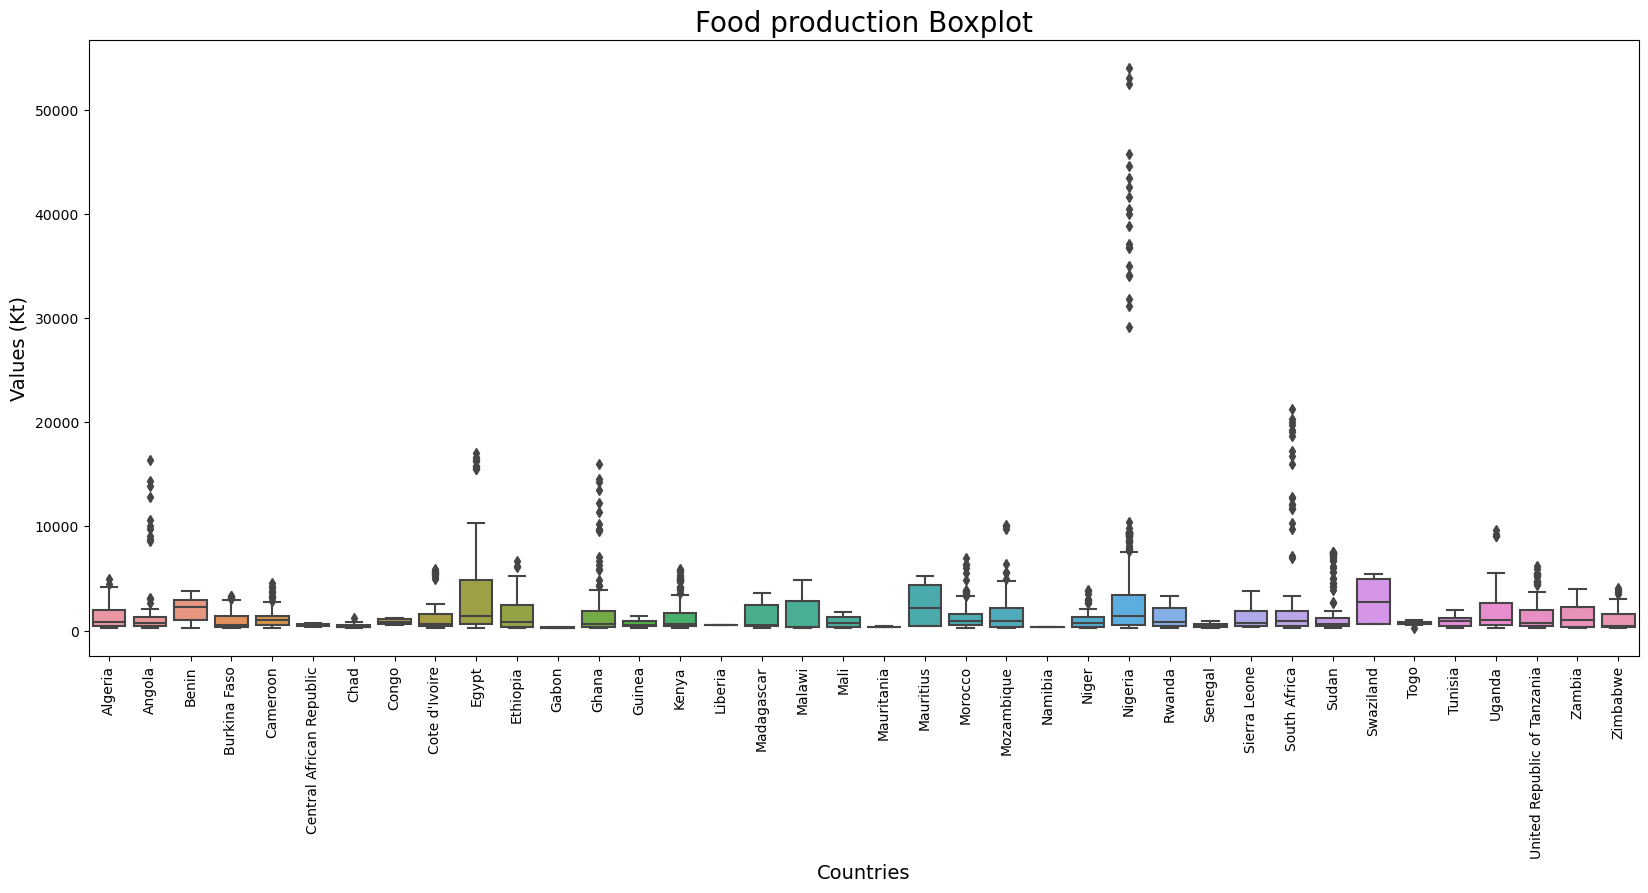

In [39]:
#visualizing the outliers by country using the values they produce

plt.figure(figsize = [20, 8])
plt.xticks(rotation = 90)
sns.boxplot(data = out, x = 'Country', y = 'Value (Kt)')
plt.title('Food production Boxplot', fontsize = 20)
plt.xlabel('Countries', fontsize = 14)
plt.ylabel('Values (Kt)', fontsize = 14)
plt.savefig('food prod boxplot.png', bbox_inches = 'tight', dpi = 300)

The boxplot further reveals that Nigeria produces food by value way more higher than the normal mean score of the overall production followed by South African, Ghana and Egypt. This anomaly is considered in statistics as outliers.

# Working on Supply/Consumption Dataset

### (A). Data Exploration

In [40]:
supp

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
5,Algeria,2009,3110
6,Algeria,2010,3142
7,Algeria,2011,3217
8,Algeria,2012,3272
9,Algeria,2013,3296


In [41]:
#taking a glance at the statistic description of the dataset

supp.describe(include = 'all')

,Country,Year,Value
count,450,450.000000,450.000000
unique,45,NaN,NaN
top,Algeria,NaN,NaN
freq,10,NaN,NaN
mean,NaN,2008.500000,2469.775556
std,NaN,2.875478,379.140143
min,NaN,2004.000000,1781.000000
25%,NaN,2006.000000,2174.000000
50%,NaN,2008.500000,2376.000000
75%,NaN,2011.000000,2681.750000


In [42]:
#checking the information of the prod dataset

supp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [43]:
#looking out for null values in the dataset

supp.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [44]:
#checking for unique values in the various columns of the dataset

supp['Country'].nunique()

45

In [45]:
supp['Year'].nunique()

10

In [46]:
supp['Value'].count()

450

looking akin to the production data, the consumption dataset has 45 countries observed in a space of 10 years on how food is supplied in these countries. And the value of the consumption amount of these countries per year is also stated totalling 450.

### (B). Dataset Cleaning 

In [47]:
#converting the Dtype of year from int64 into DateTime Dtype.

supp['Year'] = pd.to_datetime(prod['Year'], format = "%Y")

In [48]:
#rename value column to include the unit of measurement

supp.rename(columns = {'Value' : 'Value (kcal/person/day)'}, inplace = True)

In [49]:
#recheck to see if the modifications carried actually worked

supp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Country                  450 non-null    object        
 1   Year                     450 non-null    datetime64[ns]
 2   Value (kcal/person/day)  450 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.7+ KB


### (C). Analysing the Supply Dataset 

Q1 - How has supply/consumption been in Africa in the 10 years.

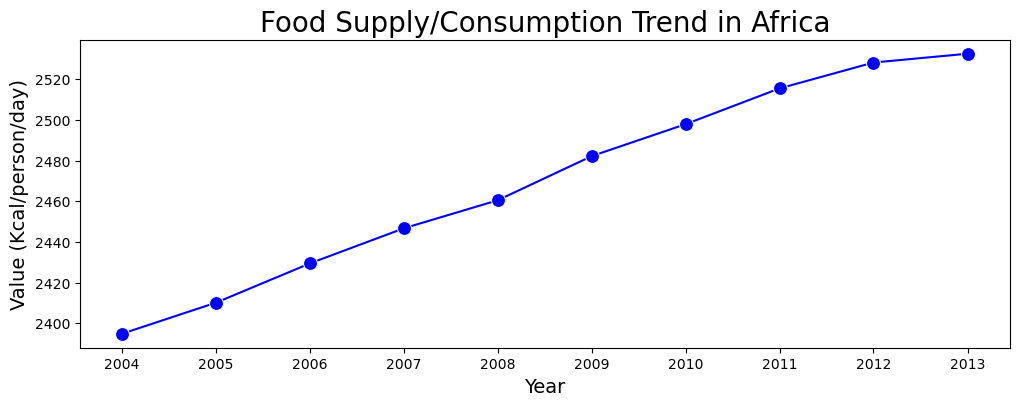

In [50]:
#getting the trend of supply of food in Africa

supptrend = supp.groupby('Year')['Value (kcal/person/day)'].mean().sort_values(ascending = True).reset_index(name = 'Value (kcal/person/day)')

plt.figure(figsize = [12, 4])
sns.lineplot(data = supptrend, x ="Year", y = 'Value (kcal/person/day)', marker='o', markersize=10, color='b')
plt.title("Food Supply/Consumption Trend in Africa", fontsize=20);
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value (Kcal/person/day)', fontsize=14)
plt.savefig('food supply trend.png', bbox_inches = 'tight', dpi = 300)

This chart shows that the consumption of food in Africa was on an average annual increment from the year 2004 to 2013.

Q2 - How did countries consume food in the years 

In [51]:
#getting how each country supplied/consumed food.

country_sup = supp.groupby('Country')['Value (kcal/person/day)'].sum().sort_values(ascending = True).reset_index()
country_sup

,Country,Value (kcal/person/day)
0,Zambia,18701
1,Ethiopia,20292
2,Chad,20511
3,Madagascar,20608
4,Central African Republic,20719
5,Zimbabwe,21209
6,Rwanda,21309
7,Kenya,21453
8,Congo,21530
9,United Republic of Tanzania,21550


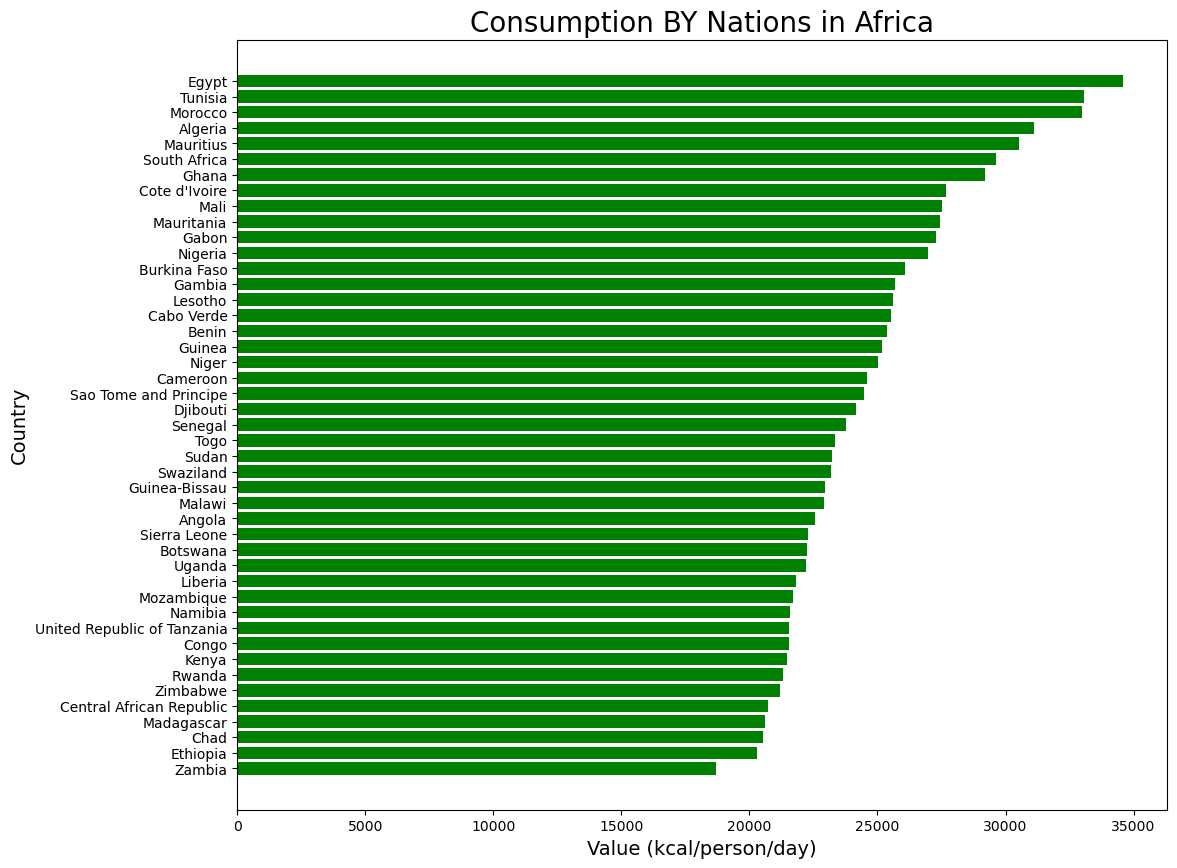

In [52]:
#visualizing the overall consumption by nation

plt.figure(figsize = [12,10])
plt.barh(country_sup['Country'], country_sup['Value (kcal/person/day)'], color = 'g')
plt.title('Consumption BY Nations in Africa', fontsize = 20)
plt.xlabel('Value (kcal/person/day)', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.savefig('supply by nations.png', bbox_inches = 'tight', dpi = 300)

This chart reveals how the countries consumed food in the given 10 year period.

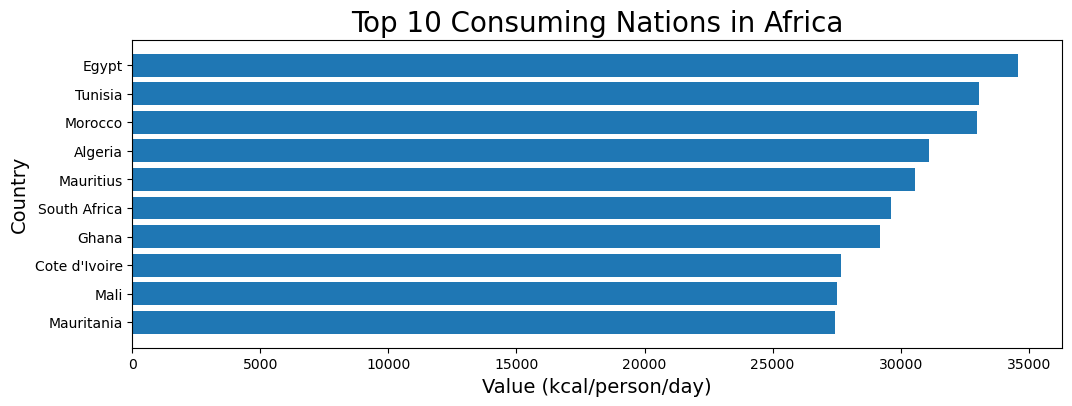

In [53]:
#getting the top 10 consuming/supplying nations

country_sup1 = supp.groupby('Country')['Value (kcal/person/day)'].sum().nlargest(10).sort_values(ascending = True).reset_index()

#plotting the top 10 nations

plt.figure(figsize = [12,4])
plt.barh(country_sup1['Country'], country_sup1['Value (kcal/person/day)'])
plt.title('Top 10 Consuming Nations in Africa', fontsize = 20)
plt.xlabel('Value (kcal/person/day)', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.savefig('top 10 supplier', bbox_inches = 'tight', dpi = 300)

The chart indicates that Egypt, Tunisia and Morocco are the top food consumption nations in Africa

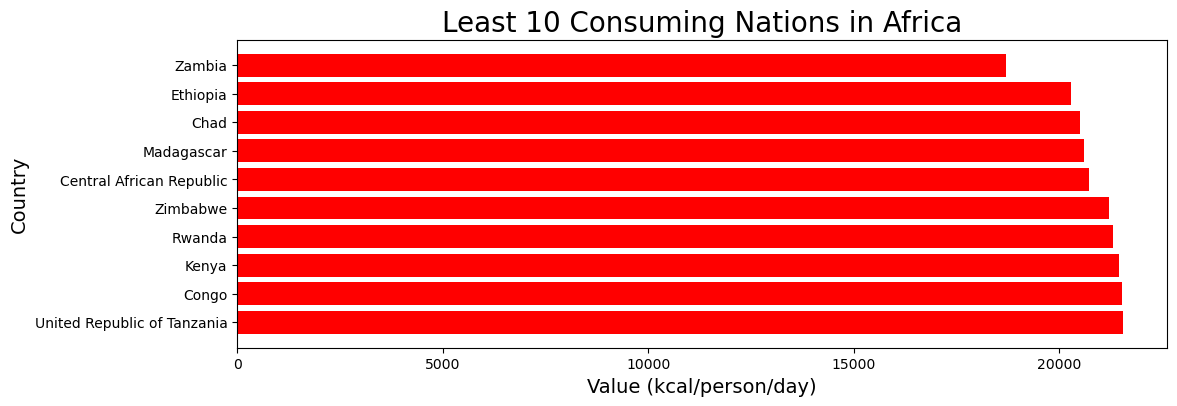

In [54]:
#getting the least 10 consuming/supplying nations

country_sup2 = supp.groupby('Country')['Value (kcal/person/day)'].sum().nsmallest(10).sort_values(ascending = False).reset_index()

#plotting the top 10 nations

plt.figure(figsize = [12,4])
plt.barh(country_sup2['Country'], country_sup2['Value (kcal/person/day)'], color = 'r')
plt.title('Least 10 Consuming Nations in Africa', fontsize = 20)
plt.xlabel('Value (kcal/person/day)', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.savefig('least 10 suppliers.png', bbox_inches = 'tight', dpi = 300)

Zambia and Ethiopia happens to be the least consuming countries as stated by the chart above.

Q3 - Any other insights from the dataset?

In [55]:
#getting the mean and median scores

avgsupp = supp['Value (kcal/person/day)'].mean()
print(' The mean value of food in Africa is ', avgsupp)

medsupp = supp['Value (kcal/person/day)'].median()
print(' The median value of food in Africa is ', medsupp)

 The mean value of food in Africa is  2469.7755555555555
 The median value of food in Africa is  2376.0


In [56]:
#getting the first quantile and 3rd quantile scores

sup_Q1 = supp['Value (kcal/person/day)'].quantile(0.25)
sup_Q3 = supp['Value (kcal/person/day)'].quantile(0.75)
print('1st Quantile score is', sup_Q1)
print('3rd Quantile score is', sup_Q3)

1st Quantile score is 2174.0
3rd Quantile score is 2681.75


In [57]:
#getting the Interquantile Range(IQR)

sup_IQR = sup_Q3 - sup_Q1
print('The Interquantile range is', sup_IQR)

The Interquantile range is 507.75


In [58]:
#getting the UpperFence and LowerFence

sup_LFence = sup_Q1 - (1.5 * sup_IQR)
sup_UFence = sup_Q3 + (1.5 * sup_IQR)
print('The Lower Fence score is ', sup_LFence)
print('The Upper Fence score is ', sup_UFence)

The Lower Fence score is  1412.375
The Upper Fence score is  3443.375


In [59]:
#looking for countries that has scores higher than the upper fence score

supp[supp['Value (kcal/person/day)'] > sup_UFence].any()

Country                    True
Year                       True
Value (kcal/person/day)    True
dtype: bool

In [60]:
#looking for countries that has scores lower than the lower fence score 

supp[supp['Value (kcal/person/day)'] < sup_LFence].any()

Country                    False
Year                       False
Value (kcal/person/day)    False
dtype: bool

The two cells above show that there are countries that has supply score that is greater than the calculated upper fence score and that there are no countries having supply scores that are lower than the calculated lower fence scores. This anomaly indicates that there are upper outliers but no lower outliers in the dataset.

In [61]:
#creating the outlier countries.
supout = supp[supp['Value (kcal/person/day)'] > sup_UFence]
supout


,Country,Year,Value (kcal/person/day)
123,Egypt,2007-01-01,3445
124,Egypt,2008-01-01,3490
126,Egypt,2010-01-01,3507
127,Egypt,2011-01-01,3549
128,Egypt,2012-01-01,3561
129,Egypt,2013-01-01,3522


In [62]:
#printing out the outlier countries

supoutlier_countries = supout['Country'].unique()
supoutlier_countries_num = supout['Country'].nunique()
print(supoutlier_countries)
print('\nTotal number of countries with outliers are ', supoutlier_countries_num)

['Egypt']

Total number of countries with outliers are  1


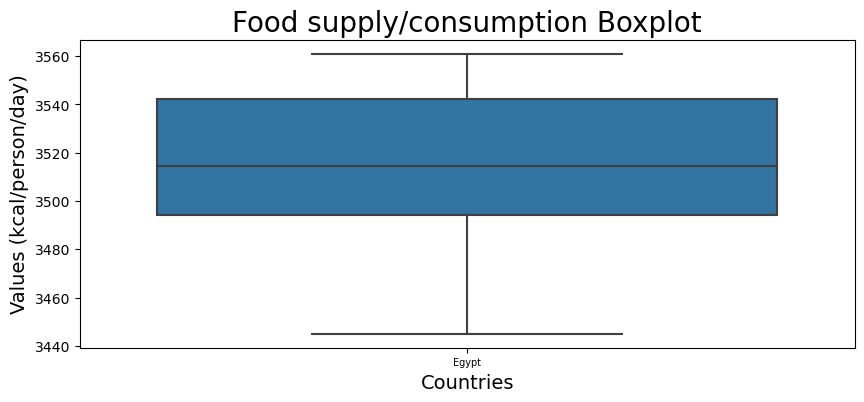

In [63]:
#visualizing the outliers by country using the values they produce

plt.figure(figsize = [10, 4])
plt.rc('xtick', labelsize = 7)
sns.boxplot(data = supout, x = 'Country', y = 'Value (kcal/person/day)')
plt.title('Food supply/consumption Boxplot', fontsize = 20)
plt.xlabel('Countries', fontsize = 14)
plt.ylabel('Values (kcal/person/day)', fontsize = 14)
plt.savefig('supply boxplot.png', bbox_inches = 'tight', dpi = 300)

The boxplot shows that it is only Egypt that has actually consumed higher than the upper fence score of 3443.

In [64]:
sdjib = supp[supp['Country'] == 'Djibouti']
szam = supp[supp['Country'] == 'Zambia']
segy = supp[supp['Country'] == 'Egypt']
snig = supp[supp['Country'] == 'Nigeria']

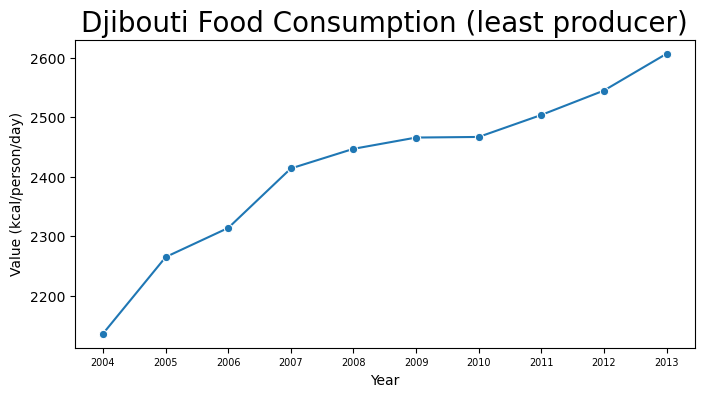

In [65]:
#plotting how Djibouti supplied food

plt.figure(figsize = [8,4])
sns.lineplot(data = sdjib, x = 'Year', y = 'Value (kcal/person/day)', marker = 'o')
plt.title('Djibouti Food Consumption (least producer)', fontsize = 20)
plt.savefig('djibouti supply.png', bbox_inches = 'tight', dpi = 300)

The chart shows how the supply of food in Djibouti happened in the 10 year period

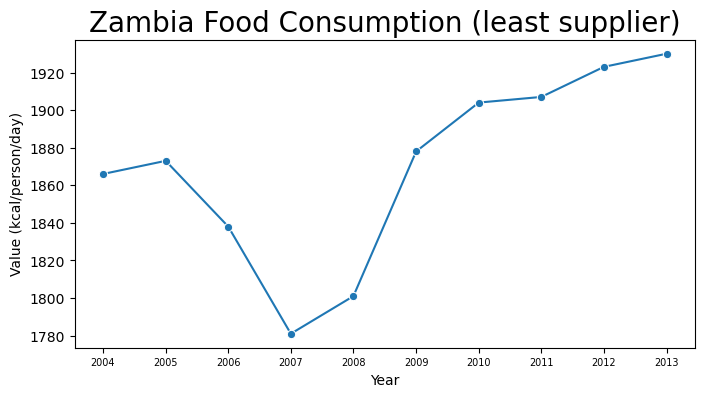

In [66]:
#plotting how Zambia supplied food

plt.figure(figsize = [8,4])
sns.lineplot(data = szam, x = 'Year', y = 'Value (kcal/person/day)', marker = 'o')
plt.title('Zambia Food Consumption (least supplier)', fontsize = 20)
plt.savefig('zambia supply.png', bbox_inches = 'tight', dpi = 300)

The chart shows the supply of food in Zambia which happens to be the least consuming nation

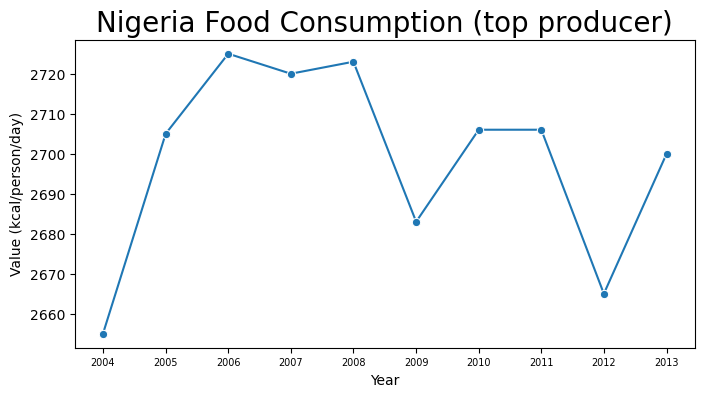

In [67]:
#plotting how Nigeria supplied food

plt.figure(figsize = [8,4])
sns.lineplot(data = snig, x = 'Year', y = 'Value (kcal/person/day)', marker = 'o')
plt.title('Nigeria Food Consumption (top producer)', fontsize = 20)
plt.savefig('nigeria supply.png', bbox_inches = 'tight', dpi = 300)

Nigeria happens to be the top producer but did not make the top consumers, this chart shows how Nigeria supply goes.

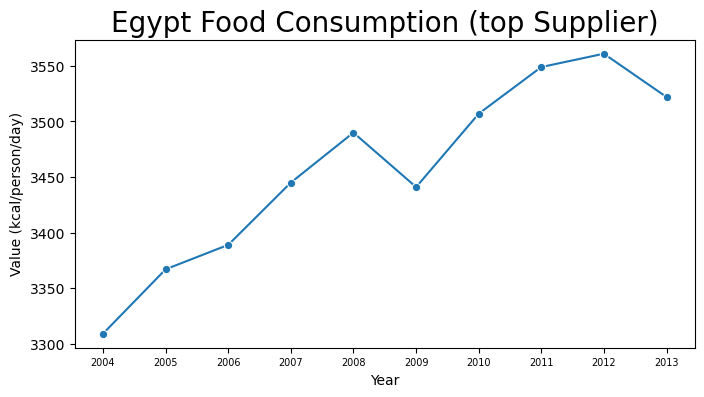

In [68]:
#plotting how Egypt supplied food

plt.figure(figsize = [8,4])
sns.lineplot(data = segy, x = 'Year', y = 'Value (kcal/person/day)', marker = 'o')
plt.title('Egypt Food Consumption (top Supplier)', fontsize = 20)
plt.savefig('eqypt supply.png', bbox_inches = 'tight', dpi = 300)

Egypt is the top consumer, how did their consumption go in the 10 year period is shown in the chart above.

## Comparing the Production and the Consumption Datasets 

In [69]:
#creating a new dataframe consisting of the total production volume and supply volume of countries.

prod_supp = pd.merge(country_vol, country_sup, on = 'Country', how = 'inner').sort_values(by = [], ascending = False)
prod_supp

,Country,Value (Kt),Value (kcal/person/day)
0,Djibouti,666,24165
1,Sao Tome and Principe,1152,24462
2,Cabo Verde,1658,25514
3,Lesotho,3785,25588
4,Gambia,4699,25695
5,Botswana,4808,22263
6,Guinea-Bissau,7296,22963
7,Mauritania,10039,27443
8,Gabon,13566,27299
9,Namibia,14197,21602


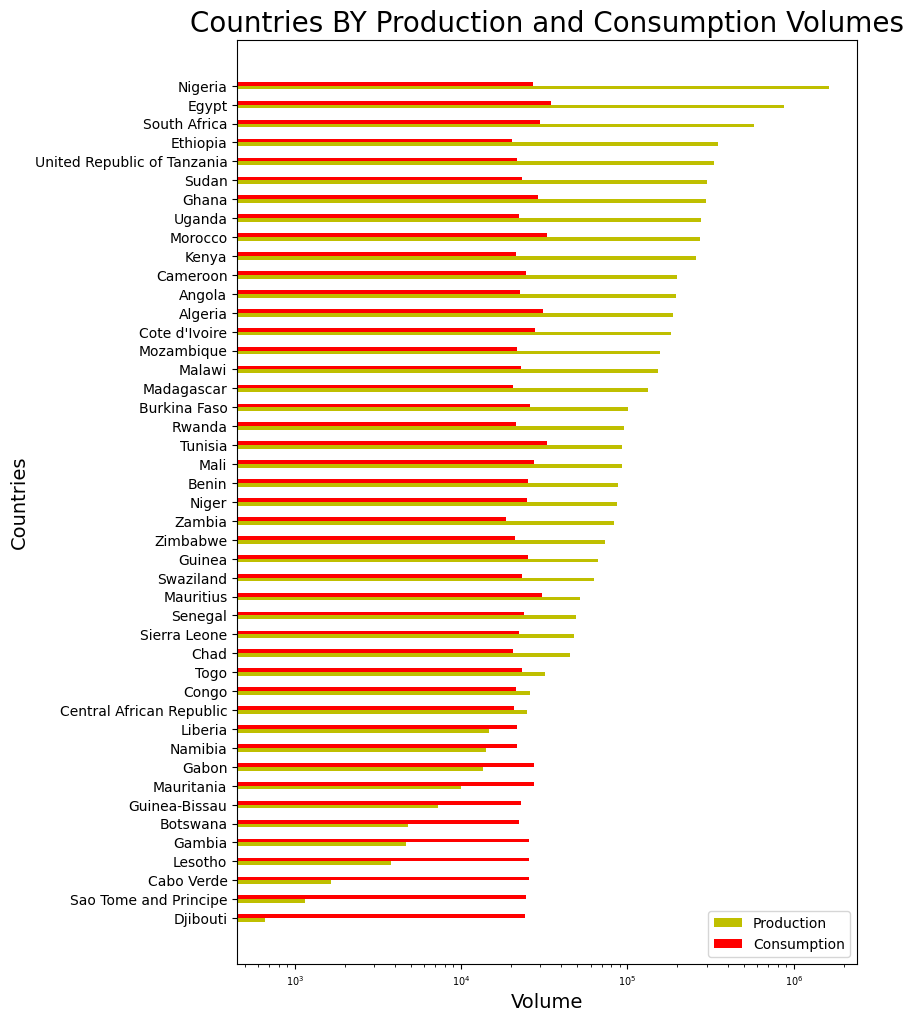

In [70]:
#Creating a grouped bar chart that combines both the production and consumption values

prod_value = prod_supp['Value (Kt)']
supp_value = prod_supp['Value (kcal/person/day)']
y = np.arange(45)

plt.figure(figsize =[8,12])
width = 0.2
plt.barh(y-0.1, prod_value, width, color = 'y', label = 'Production')
plt.barh(y+0.1, supp_value, width, color = 'r', label = 'Consumption')
plt.yticks(y, prod_supp['Country'])

legend1 = plt.legend(loc= 'lower right')

# Create custom handles and labels for the second legend
line1, = plt.plot([], [], linestyle='-', color='y')
line2, = plt.plot([], [], linestyle='-', color='r')
handles = [line1, line2]
labels = ['Production', 'Consumption']

plt.xscale('log')
plt.xlabel('Volume', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.title('Countries BY Production and Consumption Volumes', fontsize = 20)
plt.savefig('compare prod_supp.png', bbox_inches = 'tight', dpi = 300)

From the chart above, one can at a glance view how both production and consumption happens in the entire continent of Africa as represented by the 45 countries.

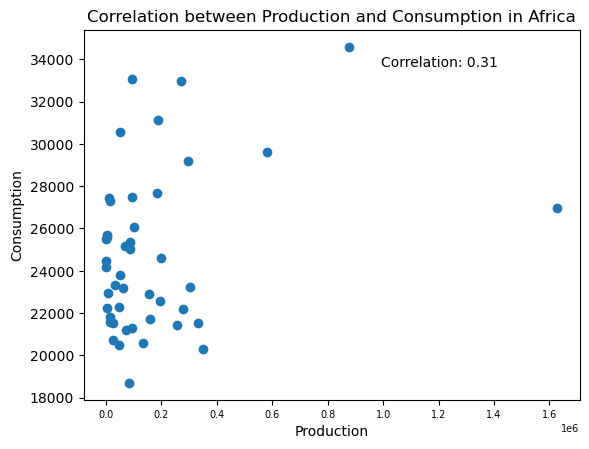

In [71]:
#Creating a scatterplot showing the correlation between the production and consumption of nations in the 10 year period.

plt.scatter(prod_value, supp_value)
plt.xlabel('Production')
plt.ylabel('Consumption')
plt.title('Correlation between Production and Consumption in Africa')

correlation = np.corrcoef(prod_value, supp_value)[0, 1]
plt.text(0.6, 0.9, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)
plt.savefig('CorrelationPlot.png', bbox_inches = 'tight', dpi = 300)

The correlation coefficient of 0.31 between the production of food and the consumption of food in Africa indicates that there is a positive relationship between the two. This implies that as prouction is increasing, supply should increase as well in normal conditions.